In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import os
import cv2
import joblib

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
DATADIR="."
#CATEGORIES=["Aaaa", "interflw","pahoehoe","transi"]
#CATEGORIES=["Aaa_enta","Aaa_lava ball","inter_brown","inter_red","pa_domed vesicle","pa_gas cavity","pa_inflection1","pa_inflection2","pa_joints","pa_pipes","pa_pipes and vesicles","pa_ropes","pa_squeezeup","pa_sq up","pa_toes","pa_vesicle banding","pa_vesicle cyl","tr_ftb 800","tr_rubbly","tr_slabby"]

CATEGORIES=[
'Aaaa','pahoehoe','transi']
numclass=len(CATEGORIES)

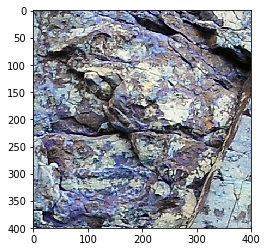

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

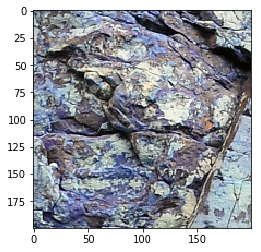

In [4]:
IMG_SIZE=200
new=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new)
plt.show()

In [5]:
#img_array


In [6]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            #print(np.shape(img_array) ,class_num)
            new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])

create_training_data()


In [7]:
import random
random.shuffle(training_data)
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)

Int64Index([1, 0, 2], dtype='int64')


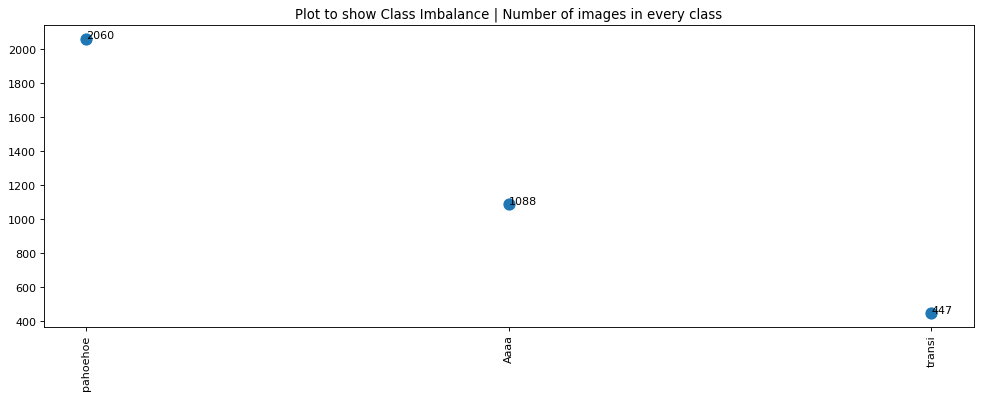

In [8]:
# PLotting Class imbalance in the data


Y=pd.Series(y)

class_counts=Y.value_counts()
print(class_counts.index)
cats=pd.Series(CATEGORIES).iloc[class_counts.index]

fig=plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

#plt.hist(y,bins=numclass, color='#0504aa',alpha=0.7, rwidth=0.85)

plt.scatter(cats,class_counts,s=100)
for i,j in zip(cats,class_counts):
    ax.annotate(str(j),xy=(i,j))

plt.xticks(rotation=90)
plt.title("Plot to show Class Imbalance | Number of images in every class")
plt.show()

#pickle_out=open("X.pickle","wb")
#pickle.dump,(y,pickle_out)
#pickle_out.close()

In [9]:
X=np.divide(X,255)


In [10]:
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.33,random_state=74,stratify=y)

# X_val, X_test, y_val,y_test = train_test_split(X_val,y_val,test_size=0.1,random_state=41,stratify=y)

## Rock Classifier for 5 fold CV

In [11]:
def rock_classifier():
    model=Sequential()

    model.add(Conv2D(20,(2,2),input_shape=X.shape[1:]))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(2,2)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(2,2)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(2,2)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(64,(2,2)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(100))

    model.add(Dense(numclass))
    model.add(Activation('softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
    #model.fit(X,y,batch_size=1,epochs=30, validation_split=0.1)
    return model
#rock_classifier()

### CV accuracy

In [12]:
estimator = KerasClassifier(build_fn=rock_classifier, epochs=25, batch_size=1,verbose=1)
skf = StratifiedKFold(n_splits=5, shuffle=True)
results=cross_val_score(estimator, X, y, cv=skf)
filename='results_400_3Class.sav'
joblib.dump(results, filename)

Epoch 1/25
2875/2875 [==============================] - 179s 62ms/step - loss: 0.7921 - acc: 0.6696
Epoch 2/25
2875/2875 [==============================] - 191s 67ms/step - loss: 0.5481 - acc: 0.7875
Epoch 3/25
2875/2875 [==============================] - 190s 66ms/step - loss: 0.4534 - acc: 0.8139
Epoch 4/25
2875/2875 [==============================] - 191s 66ms/step - loss: 0.4103 - acc: 0.8278
Epoch 5/25
2875/2875 [==============================] - 190s 66ms/step - loss: 0.3494 - acc: 0.8536
Epoch 6/25
2875/2875 [==============================] - 191s 67ms/step - loss: 0.3260 - acc: 0.8723
Epoch 7/25
2875/2875 [==============================] - 191s 66ms/step - loss: 0.2834 - acc: 0.8922
Epoch 8/25
2875/2875 [==============================] - 192s 67ms/step - loss: 0.2643 - acc: 0.9023
Epoch 9/25
2875/2875 [==============================] - 192s 67ms/step - loss: 0.2509 - acc: 0.9057
Epoch 10/25
2875/2875 [==============================] - 192s 67ms/step - loss: 0.2101 - acc: 0.9235

2877/2877 [==============================] - 199s 69ms/step - loss: 0.3566 - acc: 0.8512
Epoch 6/25
2877/2877 [==============================] - 198s 69ms/step - loss: 0.3153 - acc: 0.8634
Epoch 7/25
2877/2877 [==============================] - 198s 69ms/step - loss: 0.3258 - acc: 0.8665
Epoch 8/25
2877/2877 [==============================] - 199s 69ms/step - loss: 0.2661 - acc: 0.8822
Epoch 9/25
2877/2877 [==============================] - 199s 69ms/step - loss: 0.2562 - acc: 0.8964
Epoch 10/25
2877/2877 [==============================] - 198s 69ms/step - loss: 0.2223 - acc: 0.9037
Epoch 11/25
2877/2877 [==============================] - 198s 69ms/step - loss: 0.2073 - acc: 0.9190
Epoch 12/25
2877/2877 [==============================] - 199s 69ms/step - loss: 0.2203 - acc: 0.9166
Epoch 13/25
2877/2877 [==============================] - 199s 69ms/step - loss: 0.2100 - acc: 0.9221
Epoch 14/25
2877/2877 [==============================] - 200s 69ms/step - loss: 0.1856 - acc: 0.9291
Epoch 

['results_400_3Class.sav']

In [13]:
print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.91805556 0.88194444 0.86369958 0.93036212 0.89415042]
Baseline: 89.76% (2.41%)


## Building the Rock Model with X_train and y_train

In [14]:
model=Sequential()

model.add(Conv2D(20,(2,2),input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100))

model.add(Dense(numclass))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.fit(X_train,y_train,batch_size=1,epochs=30, validation_split=0.1)

Train on 2167 samples, validate on 241 samples
Epoch 1/30
2167/2167 [==============================] - 155s 72ms/step - loss: 0.8160 - acc: 0.6793 - val_loss: 0.7698 - val_acc: 0.7220
Epoch 2/30
2167/2167 [==============================] - 152s 70ms/step - loss: 0.6834 - acc: 0.7508 - val_loss: 0.5596 - val_acc: 0.7925
Epoch 3/30
2167/2167 [==============================] - 153s 71ms/step - loss: 0.6140 - acc: 0.7831 - val_loss: 0.4370 - val_acc: 0.8631
Epoch 4/30
2167/2167 [==============================] - 153s 70ms/step - loss: 0.5326 - acc: 0.8233 - val_loss: 0.4212 - val_acc: 0.8506
Epoch 5/30
2167/2167 [==============================] - 153s 71ms/step - loss: 0.5054 - acc: 0.8246 - val_loss: 0.4035 - val_acc: 0.8631
Epoch 6/30
2167/2167 [==============================] - 153s 71ms/step - loss: 0.4938 - acc: 0.8362 - val_loss: 0.3791 - val_acc: 0.8838
Epoch 7/30
2167/2167 [==============================] - 154s 71ms/step - loss: 0.4675 - acc: 0.8417 - val_loss: 0.3878 - val_acc: 0

#### Score and Accuracy

In [15]:
score=model.evaluate(X_val,y_val,verbose=0)
score

[0.29308474384166217, 0.8955349620893007]

### Save Model

In [16]:
from keras.models import load_model

In [17]:
model.save('Rock_Classifier_3_class.h5')

#### To Test Over Sampling by SMOTE before reshuffling